In [1]:
import matplotlib.pyplot as plt
import pandas as pd
x=pd.read_csv("202108-divvy-tripdata.csv")

# Knowing the dataset

In [2]:
x.shape

(804352, 13)

In [3]:
x.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [4]:
x.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    88458
start_station_id      88458
end_station_name      94115
end_station_id        94115
start_lat                 0
start_lng                 0
end_lat                 706
end_lng                 706
member_casual             0
dtype: int64

In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804352 entries, 0 to 804351
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             804352 non-null  object 
 1   rideable_type       804352 non-null  object 
 2   started_at          804352 non-null  object 
 3   ended_at            804352 non-null  object 
 4   start_station_name  715894 non-null  object 
 5   start_station_id    715894 non-null  object 
 6   end_station_name    710237 non-null  object 
 7   end_station_id      710237 non-null  object 
 8   start_lat           804352 non-null  float64
 9   start_lng           804352 non-null  float64
 10  end_lat             803646 non-null  float64
 11  end_lng             803646 non-null  float64
 12  member_casual       804352 non-null  object 
dtypes: float64(4), object(9)
memory usage: 79.8+ MB


In [6]:
x.dropna(how="any",subset=["start_station_name","start_station_id","end_station_name","end_station_id"],inplace=True)

In [7]:
x.shape

(674409, 13)

In [8]:
x.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

# Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
x["member_casual"]=lb.fit_transform(x["member_casual"])
x["rideable_type"]=lb.fit_transform(x["rideable_type"])

In [10]:
x["rideable_type"].value_counts()

0    501829
2    127515
1     45065
Name: rideable_type, dtype: int64

In [11]:
x["member_casual"].value_counts()

0    341476
1    332933
Name: member_casual, dtype: int64

In [20]:
x["member_casual"]= pd.to_numeric(x["member_casual"])
x["rideable_type"]= pd.to_numeric(x["rideable_type"])

In [21]:
x.dtypes

ride_id                object
rideable_type           int32
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual           int32
dtype: object

In [22]:
index=[]
for i in range(0,10000):
    index.append(i)

In [23]:
df=x[:10000]
df["index"]=index

C:\Users\hp\AppData\Local\Temp\ipykernel_14340\1963601974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["index"]=index


In [24]:
df.set_index('index',inplace=True)

# Extracting Time

In [25]:
df["started_at"]=pd.to_datetime(df["started_at"])
df["ended_at"]=pd.to_datetime(df["ended_at"])

C:\Users\hp\AppData\Local\Temp\ipykernel_14340\4136972563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["started_at"]=pd.to_datetime(df["started_at"])
C:\Users\hp\AppData\Local\Temp\ipykernel_14340\4136972563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ended_at"]=pd.to_datetime(df["ended_at"])


In [26]:
df["started_at"].dt.time

index
0       17:21:26
1       08:53:52
2       12:59:18
3       16:52:09
4       15:33:04
          ...   
9995    18:36:57
9996    21:58:05
9997    21:18:13
9998    14:45:16
9999    09:07:34
Name: started_at, Length: 10000, dtype: object

In [27]:
df["ended_at"].dt.time

index
0       17:25:37
1       09:18:29
2       12:59:55
3       16:56:51
4       16:09:00
          ...   
9995    18:51:38
9996    22:06:19
9997    21:30:29
9998    14:59:44
9999    09:16:07
Name: ended_at, Length: 10000, dtype: object

In [28]:
import datetime
t=[]  
for i in range(0,10000):
    s1=df["started_at"].dt.strftime("%S")[i]
    s2=df["ended_at"].dt.strftime("%S")[i]

    m1=df["started_at"].dt.strftime("%M")[i]
    m2=df["ended_at"].dt.strftime("%M")[i]
    
    h1=df["started_at"].dt.strftime("%H")[i]
    h2=df["ended_at"].dt.strftime("%H")[i]
    
    y1=df["started_at"].dt.strftime("%Y")[i]
    y2=df["ended_at"].dt.strftime("%Y")[i]
    
    mo1=df["started_at"].dt.strftime("%m")[i]
    mo2=df["ended_at"].dt.strftime("%m")[i]
    
    d1=df["started_at"].dt.strftime("%d")[i]
    d2=df["ended_at"].dt.strftime("%d")[i]
    
    
    d=datetime.datetime(int(y2),int(mo2),int(d2),int(h2),int(m2),int(s2))-datetime.datetime(int(y1),int(mo1),int(d1),int(h1),int(m1),int(s1))
    d1=d.seconds/60 
    t.append(d1)

In [29]:
df["Time_taken(min)"]=t
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_14340\2462465018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Time_taken(min)"]=t


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Time_taken(min)
index,,,,,,,,,,,,,,
0,DD06751C6019D865,0,2021-08-08 17:21:26,2021-08-08 17:25:37,Desplaines St & Kinzie St,TA1306000003,Kingsbury St & Kinzie St,KA1503000043,41.888716,-87.644448,41.889177,-87.638506,1,4.183333
1,79973DC3B232048F,0,2021-08-27 08:53:52,2021-08-27 09:18:29,Larrabee St & Armitage Ave,TA1309000006,Michigan Ave & Oak St,13042,41.918084,-87.643749,41.900960,-87.623777,1,24.616667
2,0249AD4B258806AD,0,2021-08-08 12:59:18,2021-08-08 12:59:55,Aberdeen St & Jackson Blvd,13157,Aberdeen St & Jackson Blvd,13157,41.877726,-87.654787,41.877726,-87.654787,1,0.616667
3,F41EB054E44ACFDA,0,2021-08-12 16:52:09,2021-08-12 16:56:51,Michigan Ave & Oak St,13042,Michigan Ave & Oak St,13042,41.900960,-87.623777,41.900960,-87.623777,0,4.700000
4,B149E6C71A1C3B14,0,2021-08-23 15:33:04,2021-08-23 16:09:00,Michigan Ave & Oak St,13042,Michigan Ave & Oak St,13042,41.900960,-87.623777,41.900960,-87.623777,0,35.933333


In [34]:
df.describe()

,rideable_type,start_lat,start_lng,end_lat,end_lng,member_casual,Time_taken(min)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.439900,41.910289,-87.647411,41.909965,-87.647623,0.442000,21.575095
std,0.794891,0.042364,0.024052,0.041542,0.024790,0.496649,40.986387
min,0.000000,41.684994,-87.780000,41.687015,-87.780000,0.000000,0.016667
25%,0.000000,41.883073,-87.659753,41.883984,-87.660923,0.000000,6.400000
50%,0.000000,41.906866,-87.651156,41.904613,-87.648950,0.000000,11.850000
75%,0.000000,41.936316,-87.629542,41.936266,-87.626217,1.000000,23.354167
max,2.000000,42.064305,-87.548515,42.064854,-87.549700,1.000000,1097.966667


# Variance threshold

In [35]:
from sklearn.feature_selection import VarianceThreshold
v=VarianceThreshold(threshold=0.5)
v.fit(df[["rideable_type","Time_taken(min)",'start_lat','start_lng','end_lat','end_lng']])

VarianceThreshold(threshold=0.5)

In [36]:
v.get_support()

array([ True,  True, False, False, False, False])

# Correlation

<AxesSubplot:>

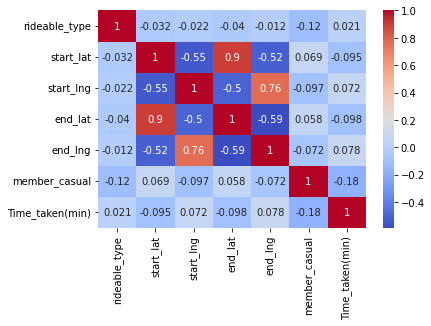

In [25]:
import seaborn as sns
corr_matrix=df.corr()
sns.heatmap(data = corr_matrix,annot=True,cmap=plt.cm.coolwarm)

In [37]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1)
model.fit(df[["Time_taken(min)",'start_lat','start_lng','end_lat','end_lng',"rideable_type"]],df.member_casual)

RandomForestRegressor(random_state=1)

feature:0, Score:0.41710116685255777
feature:1, Score:0.1369655897901877
feature:2, Score:0.14147350804337788
feature:3, Score:0.13298435328962943
feature:4, Score:0.13438000028830868
feature:5, Score:0.03709538173593851


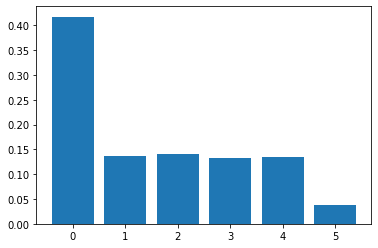

In [38]:
import numpy as np
importances = model.feature_importances_
for i,v in enumerate(importances):
    print(f'feature:{i}, Score:{v}')
    # plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()

<AxesSubplot:ylabel='rideable_type'>

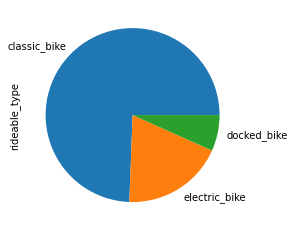

In [11]:
import matplotlib.pyplot as plt
x["rideable_type"].value_counts().plot(kind="pie")

<AxesSubplot:ylabel='member_casual'>

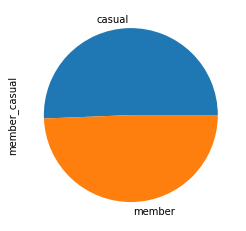

In [10]:
x["member_casual"].value_counts().plot(kind="pie")

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Time_taken(min)', ylabel='Density'>

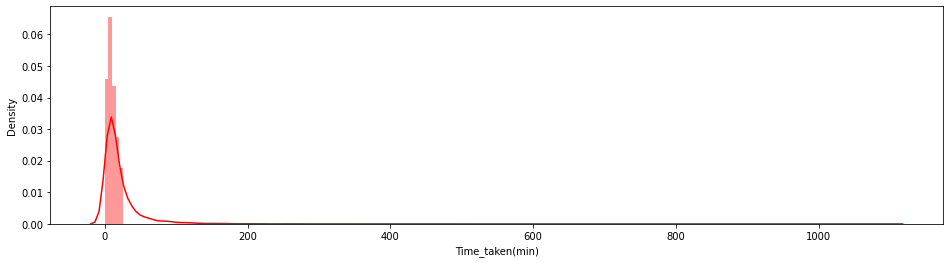

In [51]:
fig, ax = plt.subplots(figsize=[16,4])
sns.distplot(df["Time_taken(min)"],ax=ax,color="red")

# Outliers

<AxesSubplot:>

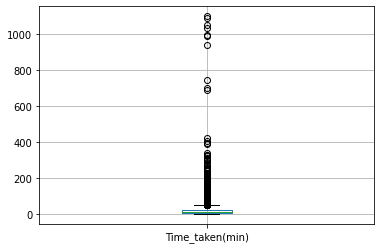

In [39]:
df.boxplot(column = ['Time_taken(min)'])

In [69]:
df.dtypes

ride_id                       object
rideable_type                float64
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                float64
Time_taken(min)              float64
log                          float64
dtype: object

# IQR

In [40]:
Q1 = df['Time_taken(min)'].quantile(.25)
Q3 = df['Time_taken(min)'].quantile(.75)
IQR = Q3 - Q1
uw_rate = Q3 + (1.5 * IQR)
lw_rate = Q1 - (1.5 * IQR)
print(uw_rate)
print(lw_rate)

48.78541666666666
-19.03125


# log transformation

In [41]:
df['log'] = df['Time_taken(min)'].map(lambda i : np.log(i) if i > 0 else 0)
print(df['Time_taken(min)'].skew())
print(df['log'].skew())

13.47690400651647
-0.8151452079419248


C:\Users\hp\AppData\Local\Temp\ipykernel_14340\2901698736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log'] = df['Time_taken(min)'].map(lambda i : np.log(i) if i > 0 else 0)


# flooring and capping

In [42]:
df['Time_taken(min)'] = np.where(df['Time_taken(min)'] < lw_rate , lw_rate, df['Time_taken(min)'])
df['Time_taken(min)'] = np.where(df['Time_taken(min)'] > uw_rate, uw_rate, df['Time_taken(min)'])

C:\Users\hp\AppData\Local\Temp\ipykernel_14340\2798509313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time_taken(min)'] = np.where(df['Time_taken(min)'] < lw_rate , lw_rate, df['Time_taken(min)'])
C:\Users\hp\AppData\Local\Temp\ipykernel_14340\2798509313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time_taken(min)'] = np.where(df['Time_taken(min)'] > uw_rate, uw_rate, df['Time_taken(min)'])


1.083660326558945


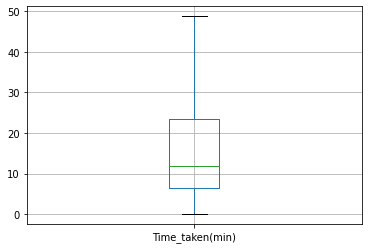

In [66]:
df.boxplot(column = ['Time_taken(min)'])
print(df['Time_taken(min)'].skew())

Before handling outliers in member_casual


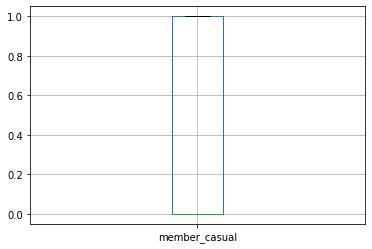

2.5
-1.5
After handling outliers in member_casual


C:\Users\hp\AppData\Local\Temp\ipykernel_14340\3655312570.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] < lw , lw, df[col])
C:\Users\hp\AppData\Local\Temp\ipykernel_14340\3655312570.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] > uw, uw, df[col])


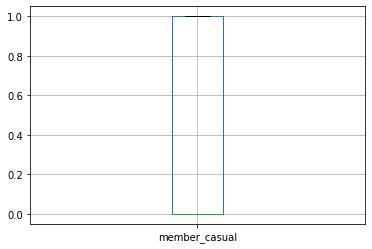

Before handling outliers in rideable_type


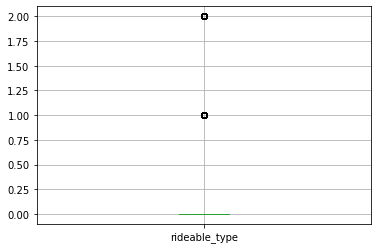

0.0
0.0
After handling outliers in rideable_type


C:\Users\hp\AppData\Local\Temp\ipykernel_14340\3655312570.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] < lw , lw, df[col])
C:\Users\hp\AppData\Local\Temp\ipykernel_14340\3655312570.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] > uw, uw, df[col])


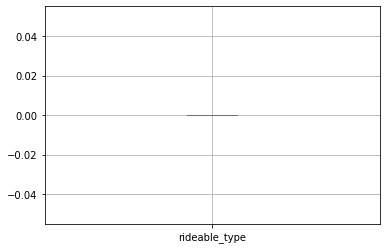

In [44]:
d=["member_casual","rideable_type"]
def outlier_handle(col):
    print(f'Before handling outliers in {col}')
    df.boxplot(column = [col])
    plt.show()
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    uw = Q3 + (1.5 * IQR)
    lw = Q1 - (1.5 * IQR)
    print(uw)
    print(lw)
    df[col] = np.where(df[col] < lw , lw, df[col])
    df[col] = np.where(df[col] > uw, uw, df[col])
    print(f'After handling outliers in {col}')
    df.boxplot(column = [col])
    plt.show()
for i in d:
    outlier_handle(i)

# Model implementaion: Random forest

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x=df[['Time_taken(min)',"rideable_type"]]
y = df[['member_casual']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
rf = RandomForestClassifier(n_estimators=500,random_state=5).fit(x_train, y_train)

C:\Users\hp\AppData\Local\Temp\ipykernel_14340\2900265915.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(n_estimators=500,random_state=5).fit(x_train, y_train)


In [46]:
y_pred=rf.predict(x_test)

training set

In [47]:
rf.score(x_train,y_train)

0.7504285714285714

test set

In [48]:
rf.score(x_test,y_test)

0.5703333333333334

# Evaluation

In [49]:
from sklearn.metrics import confusion_matrix,classification_report
cm1=confusion_matrix(y_test,y_pred)
cm1

array([[1007,  678],
       [ 611,  704]], dtype=int64)

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.62      0.60      0.61      1685
         1.0       0.51      0.54      0.52      1315

    accuracy                           0.57      3000
   macro avg       0.57      0.57      0.57      3000
weighted avg       0.57      0.57      0.57      3000



# Model implementation: KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier
X=df[['Time_taken(min)',"rideable_type"]]
y = df[['member_casual']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=142)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=2)

In [52]:
pred = knn.predict(X_test)

training set

In [53]:
score1=knn.score(X_train,y_train)
score1

0.6669333333333334

testing set

In [54]:
score=knn.score(X_test,y_test)
score

0.5668

# Evaluation

In [55]:
cm2=confusion_matrix(y_test,pred)
cm2

array([[1116,  228],
       [ 855,  301]], dtype=int64)

In [56]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.57      0.83      0.67      1344
         1.0       0.57      0.26      0.36      1156

    accuracy                           0.57      2500
   macro avg       0.57      0.55      0.52      2500
weighted avg       0.57      0.57      0.53      2500



# Model Implementation: Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
x=df[['Time_taken(min)',"rideable_type"]]
y=df["member_casual"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
logistic.fit(x_train, y_train)

LogisticRegression()

In [58]:
p=logistic.predict(x_test)

training set

In [67]:
p1=logistic.score(x_train,y_train)
p1

0.6082857142857143

testing set

In [68]:
p2=logistic.score(x_test,y_test)
p2

0.623

# Evaluation

In [61]:
confusion_matrix(y_test,p)

array([[1048,  611],
       [ 520,  821]], dtype=int64)

In [62]:
print(classification_report(y_test,p))

              precision    recall  f1-score   support

         0.0       0.67      0.63      0.65      1659
         1.0       0.57      0.61      0.59      1341

    accuracy                           0.62      3000
   macro avg       0.62      0.62      0.62      3000
weighted avg       0.63      0.62      0.62      3000

